In [5]:
import numpy as np
import cv2 
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
# Read images
img = cv2.imread('./test_images/sharapova1.jpeg')
img.shape

(275, 183, 3)

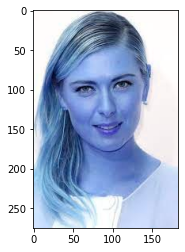

In [7]:
plt.imshow(img)

In [8]:
# convert RGB image into GRAY image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(275, 183)

In [9]:
gray

array([[251, 251, 251, ..., 252, 252, 252],
       [251, 251, 251, ..., 252, 252, 252],
       [251, 251, 251, ..., 252, 252, 252],
       ...,
       [234, 234, 234, ..., 224, 224, 224],
       [234, 234, 234, ..., 224, 224, 224],
       [234, 234, 234, ..., 224, 224, 224]], dtype=uint8)

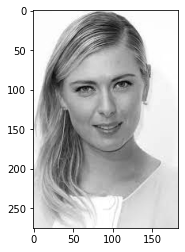

In [10]:
plt.imshow(gray, cmap='gray')

In [11]:
# Detect faces
face_cascade = cv2.CascadeClassifier("./haarcascades/haarcascade_frontalface_default.xml")
#Detect eyes
eye_cascade = cv2.CascadeClassifier("./haarcascades/haarcascade_eye.xml")

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
# Here the gray means the gray image of Maria Sharapova
faces

array([[ 26,  49, 127, 127]])

In [12]:
# store the first face
(x,y,w,h) = faces[0]
x, y, w, h

(26, 49, 127, 127)

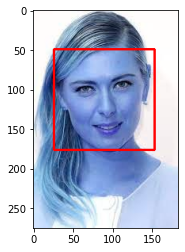

In [13]:
# draw a rectangle around the face
face_img = cv2.rectangle(img, (x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

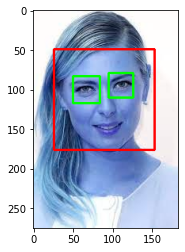

In [14]:
if cv2.getWindowProperty('window_name', cv2.WND_PROP_VISIBLE) >= 1:
    cv2.destroyAllWindows()
# Here we iterate through all the faces
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    # First we draw the face images, which is the red rectangle drawn aroung the face
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    # In this code the roi_color is the rectangle that you see on the face
    # After that we apply eye cascasde
    eyes = eye_cascade.detectMultiScale(roi_gray)
    # WE run a for loop as there can be multiple eyes
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        # This rectangle would be in green color
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

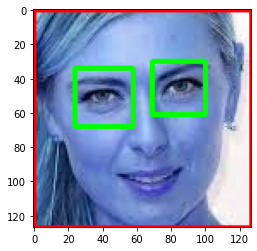

In [15]:
# get crop face
%matplotlib inline
plt.imshow(roi_color, cmap="gray")

In [16]:
def get_cropped_image_if_2_eyes(image_path):
    # The image will be supplied using an image path as an input this function
    # Reading the image
    img = cv2.imread(image_path)
    if img is None:
        return None
    
    # Converts the image from BGR to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Detects faces using Haar Cascade
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

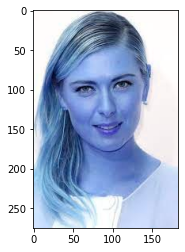

In [17]:
original_image = cv2.imread("./test_images/sharapova1.jpeg")
plt.imshow(original_image)

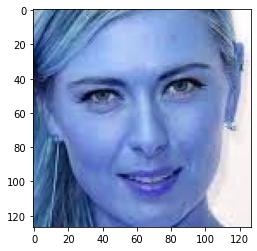

In [18]:
# return through the function
cropped_image = get_cropped_image_if_2_eyes("./test_images/sharapova1.jpeg")
plt.imshow(cropped_image)

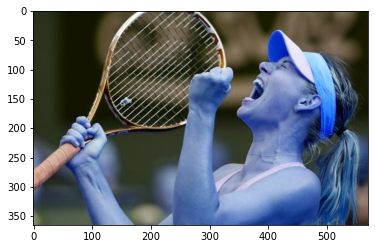

In [19]:
org_image_obstructed = cv2.imread("./test_images/sharapova2.jpeg")
plt.imshow(org_image_obstructed)

In [20]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes("./test_images/sharapova2.jpeg")
cropped_image_no_2_eyes

In [21]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [22]:
# Go thtough all sub directory folder
import os
img_dirs = []
for entry in os.scandir(path_to_data):
# This goes through all the subdirectories in the dataset folder
    if entry.is_dir():
        img_dirs.append(entry.path)
        # The names of the subdirectories will be stored in the img_dirs variable.

In [23]:
img_dirs

['./dataset/cropped',
 './dataset/lionel_messi',
 './dataset/maria_sharapova',
 './dataset/roger_federer',
 './dataset/serena_williams',
 './dataset/virat_kohli']

In [24]:
import shutil
if os.path.exists(path_to_cr_data):
# If the folder exists
    shutil.rmtree(path_to_cr_data)
    # ..then remove it
os.mkdir(path_to_cr_data)
# This line will create the folder

In [26]:
cropped_image_dirs = []
# This is similar to img_dirs but it contains the cropped folder path for each of our 5 players

celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    # Spliitting the string and taking the last element
    
    
    celebrity_file_names_dict[celebrity_name] = []
    
    #next we iterrate through all the images
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
        # which means the face and eyes are clearly visible
        # Now you can store that image to a cropped folder
        
            cropped_folder = path_to_cr_data + celebrity_name
            # In "cropped" folder you need to create a subfolder first for your player
            
            if not os.path.exists(cropped_folder):
            # if this folder doesn't exist
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ", cropped_folder)
            
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            # Here the first argument is the file path
            # Second argument is the region of interest
            # Once you execute this line your cropped image will be stored in the cropped folder
            
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            # Here we store the names of all those image filepaths into a dictionary
            # This dictionary will be useful later on 
            # The key in this dictionary will be the name of the celebrity
            # The value will be the list of file paths
            count += 1

Generating cropped images in folder:  ./dataset/cropped/lionel_messi
Generating cropped images in folder:  ./dataset/cropped/maria_sharapova
Generating cropped images in folder:  ./dataset/cropped/roger_federer
Generating cropped images in folder:  ./dataset/cropped/serena_williams
Generating cropped images in folder:  ./dataset/cropped/virat_kohli


In [27]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'lionel_messi': ['./dataset/cropped/lionel_messi\\lionel_messi1.png',
  './dataset/cropped/lionel_messi\\lionel_messi10.png',
  './dataset/cropped/lionel_messi\\lionel_messi11.png',
  './dataset/cropped/lionel_messi\\lionel_messi13.png',
  './dataset/cropped/lionel_messi\\lionel_messi14.png',
  './dataset/cropped/lionel_messi\\lionel_messi15.png',
  './dataset/cropped/lionel_messi\\lionel_messi16.png',
  './dataset/cropped/lionel_messi\\lionel_messi17.png',
  './dataset/cropped/lionel_messi\\lionel_messi18.png',
  './dataset/cropped/lionel_messi\\lionel_messi19.png',
  './dataset/cropped/lionel_messi\\lionel_messi2.png',
  './dataset/cropped/lionel_messi\\lionel_messi20.png',
  './dataset/cropped/lionel_messi\\lionel_messi22.png',
  './dataset/cropped/lionel_messi\\lionel_messi23.png',
  './dataset/cropped/lionel_messi\\lionel_messi24.png',
  './dataset/cropped/lionel_messi\\lionel_messi25.png',
  './dataset/cropped/lionel_messi\\lionel_messi26.png',
  './dataset/cropped/lionel_messi\

In [28]:
import numpy as np
import pywt
import cv2

def w2d(img, mode="haar", level=1):
    imArray = img
    #Datatype conversions
    
    #convert to grayscale
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    
    # convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H
    

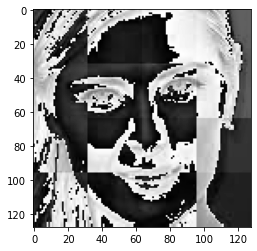

In [29]:
im_har = w2d(cropped_image, 'db1', 5)
plt.imshow(im_har, cmap="gray")

In [30]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [31]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
# Here training_files are the list of images
    for training_image in training_files:
        # First the image is read
        img = cv2.imread(training_image)
        
        if img is None:
            continue
        # Now you do scaling as the images should be in the same size
        scalled_raw_img = cv2.resize(img, (32, 32))
        
        # Now you get the wavelet transformed image
        img_har = w2d(img,'db1',5)
        
        # You scale that image as well
        scalled_img_har = cv2.resize(img_har, (32, 32))
        
        # You vertically stack those images
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        # scaled image has 32*32*3 because there are 3 channels (r,g,b) 
        
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [32]:
len(X)

166

In [33]:
len(X[0])

4096

In [34]:
32*32*3 + 32*32

4096

In [35]:
X[0]

array([[100],
       [129],
       [140],
       ...,
       [237],
       [234],
       [232]], dtype=uint8)

In [36]:
# Covert to float
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(166, 4096)

In [37]:
X[0]

array([100., 129., 140., ..., 237., 234., 232.])

In [38]:
y[0]

0

In [39]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

train our model

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Creating a sklearn pipeline
# To scale our data
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C=10))])
# You should first scale the X_train. You can also use minmaxscaler
# And then in the next step you are creating an SVM model with certain parameters
# The parameters here are randomly chosen
# The parameters are fine tuned later on using gridserachcv

pipe.fit(X_train, y_train)

pipe.score(X_test, y_test)
# Here you can test how well your model is performing

0.9047619047619048

In [41]:
len(X_test)

42

In [42]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.90      1.00      0.95         9
           2       0.67      1.00      0.80         4
           3       1.00      1.00      1.00         7
           4       0.93      0.93      0.93        15

    accuracy                           0.90        42
   macro avg       0.90      0.90      0.88        42
weighted avg       0.92      0.90      0.90        42



In [43]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [44]:
model_params = {
    'svm':{
        'model': svm.SVC(gamma='auto', probability=True),
        'params': {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'randomforestclassifier__n_estimators': [1,5,10]
            # These are the number of decision trees
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C':[1,5,10]
        }
    }
    
}

In [45]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf = GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores, columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.813667,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.628333,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.845667,{'logisticregression__C': 10}


In [46]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=10, solver='liblinear'))])}

In [47]:
best_estimators['svm']

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=1, gamma='auto', kernel='linear', probability=True))])

In [48]:
best_estimators['svm'].score(X_test, y_test)

0.9761904761904762

In [49]:
best_estimators['random_forest'].score(X_test, y_test)

0.6428571428571429

In [50]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.9523809523809523

In [51]:
best_clf = best_estimators['svm']

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 7,  0,  0,  0,  0],
       [ 0,  9,  0,  0,  0],
       [ 0,  0,  4,  0,  0],
       [ 0,  0,  0,  7,  0],
       [ 0,  1,  0,  0, 14]], dtype=int64)

Text(69.0, 0.5, 'Truth')

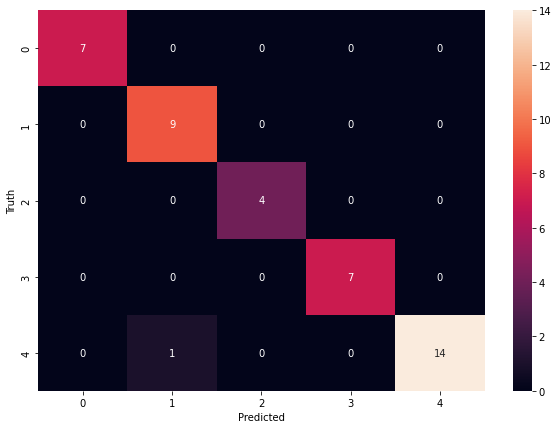

In [53]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [54]:
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [55]:
!pip install joblib
import joblib

Defaulting to user installation because normal site-packages is not writeable


In [56]:
# Save the model as a pickle in a file
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [116]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

In [57]:
pip show scikit-learn

Name: scikit-learn
Version: 1.0.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\programdata\anaconda3\lib\site-packages
Requires: numpy, scipy, joblib, threadpoolctl
Required-by: qudida, scikit-learn-intelex
Note: you may need to restart the kernel to use updated packages.


In [58]:
pip show joblib

Name: joblib
Version: 1.1.0
Summary: Lightweight pipelining with Python functions
Home-page: https://joblib.readthedocs.io
Author: Gael Varoquaux
Author-email: gael.varoquaux@normalesup.org
License: BSD
Location: c:\programdata\anaconda3\lib\site-packages
Requires: 
Required-by: scikit-learn, nltk
Note: you may need to restart the kernel to use updated packages.


In [59]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.base import BaseEstimator, ClassifierMixin

In [62]:
class CNN(BaseEstimator, ClassifierMixin):
    def __init__(self, n_classes=2, input_shape=(64, 64, 3)):
        self.n_classes = n_classes
        self.input_shape = input_shape
        self.model = Sequential()
        self.model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
        self.model.add(MaxPooling2D((2, 2)))
        self.model.add(Conv2D(64, (3, 3), activation='relu'))
        self.model.add(MaxPooling2D((2, 2)))
        self.model.add(Conv2D(128, (3, 3), activation='relu'))
        self.model.add(MaxPooling2D((2, 2)))
        self.model.add(Flatten())
        self.model.add(Dense(512, activation='relu'))
        self.model.add(Dense(n_classes, activation='softmax'))
        self.model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        
    def fit(self, X, y):
        y_cat = to_categorical(y, num_classes=self.n_classes)
        self.model.fit(X, y_cat, epochs=10)
        
    def predict(self, X):
        y_pred = self.model.predict_classes(X)
        return y_pred
        
model_params['cnn'] = {
    'model': CNN(),
    'params': {
        'cnn__n_classes': [2],
        'cnn__input_shape': [(64, 64, 3)]
    }
}

In [63]:
import pandas as pd

In [64]:
# Assuming you have your test data in a variable called X_test
# and your model is called clf
y_pred = clf.predict(X_test)

# Convert predictions to a DataFrame
df = pd.DataFrame(y_pred, columns=['predicted_label'])

# Write predictions to a CSV file
df.to_csv('predictions.csv', index=False)


In [66]:
from sklearn.metrics import accuracy_score

# Assuming your test data is stored in a variable called X_test
# and your test labels are stored in a variable called y_test
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Test accuracy:', accuracy)


Test accuracy: 0.9523809523809523
